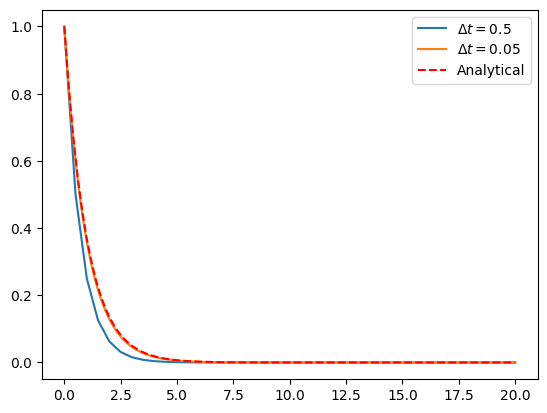

In [1]:
import matplotlib.pyplot as plt
import numpy as np

f_0 = 1
t_max = 20


def forward_euler(dt):
    F = [f_0]
    T = np.linspace(0, t_max, int(1 + t_max / dt))
    for t in T[1:]:
        f_k = F[-1]
        F.append(f_k - dt * f_k)
    return T, F


# Analytical solution
T = np.linspace(0, 20, 101)
F = np.exp(-T)

plt.plot(*forward_euler(0.5), label=r"$\Delta t=0.5$")
plt.plot(*forward_euler(0.05), label=r"$\Delta t=0.05$")
plt.plot(T, F, "r--", label=r"Analytical")
plt.legend()

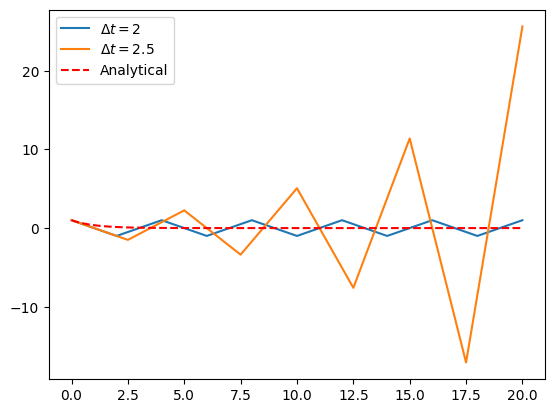

In [2]:
plt.plot(*forward_euler(2), label=r"$\Delta t=2$")
plt.plot(*forward_euler(2.5), label=r"$\Delta t=2.5$")
plt.plot(T, F, "r--", label=r"Analytical")
plt.legend()

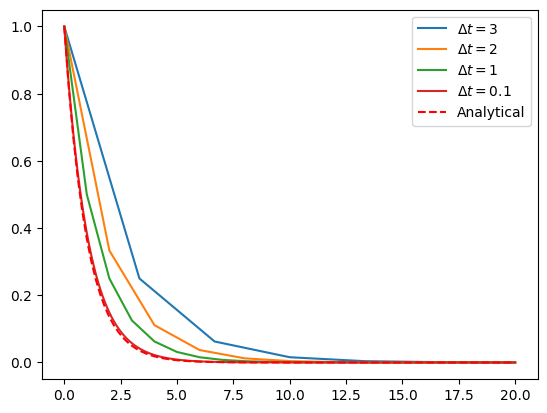

In [3]:
def backwards_euler(dt):
    F = [f_0]
    T = np.linspace(0, t_max, int(1 + t_max / dt))
    for t in T[1:]:
        f_k = F[-1]
        F.append(f_k / (1 + dt))
    return T, F


# Numerical solution for dt = 3, 2, 1 and 0.1
plt.plot(*backwards_euler(3), label=r"$\Delta t=3$")
plt.plot(*backwards_euler(2), label=r"$\Delta t=2$")
plt.plot(*backwards_euler(1), label=r"$\Delta t=1$")
plt.plot(*backwards_euler(0.1), label=r"$\Delta t=0.1$")
plt.plot(T, F, "r--", label=r"Analytical")
plt.legend()

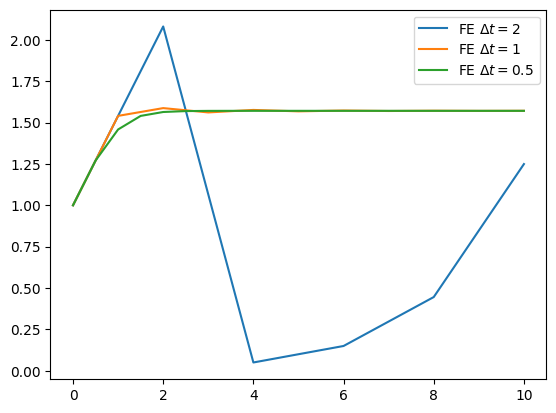

In [4]:
f_0 = 1
t_max = 10


def forward_euler(dt):
    F = [f_0]
    T = np.linspace(0, t_max, int(1 + t_max / dt))
    for t in T[1:]:
        f_k = F[-1]
        F.append(f_k + dt * f_k * np.cos(f_k))
    return T, F


for dt in [2, 1, 0.5]:
    plt.plot(*forward_euler(dt), label=r"FE $\Delta t = {}$".format(dt))

plt.legend()

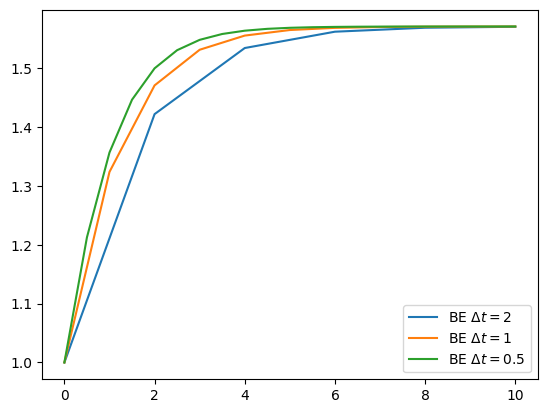

In [5]:
def newton_method(function, derivative, initial_guess, tolerance, max_iteration=40):
    x_n = initial_guess
    iteration = 0
    while abs(function(x_n)) > tolerance and iteration < max_iteration:
        x_n -= function(x_n) / derivative(x_n)
        iteration += 1
    if abs(function(x_n)) > tolerance:  # Not converged
        print("Did not converge after {} iterations.".format(iteration))
    return x_n


def g(f, f_k, dt):
    return f * (1 - dt * np.cos(f)) - f_k


def g_prime(f, dt):
    return 1 - dt * np.cos(f) + f * np.sin(f)


def backwards_euler(dt):
    F = [f_0]
    T = np.linspace(0, t_max, int(1 + t_max / dt))
    for t in T[1:]:
        f_k = F[-1]
        F.append(
            newton_method(lambda f: g(f, f_k, dt), lambda f: g_prime(f, dt), f_k, 1e-6)
        )
    return T, F


for dt in [2, 1, 0.5]:
    plt.plot(*backwards_euler(dt), label=r"BE $\Delta t = {}$".format(dt))

plt.legend()